In [2]:
!pip install -q qbstyles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

from qbstyles import mpl_style
mpl_style(dark=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

import statsmodels.api as sm

print('imports completed — ready to load data')

imports completed — ready to load data


# Session 12 — Pizza Hut Case Study

**Objective**
Evaluate the effect of price and gender on the purchase of a pizza from Pizza Hut using logistic regression.

**Variables**
- **Purchase** (Target): 1 = selected Pizza Hut, 0 = selected another pizzeria
- **Price**: Price of the Pizza Hut pizza ($8.49 - $14.49)
- **Gender**: 1 = Male, 0 = Female

**Questions**
a. Model A: Predict Purchase based on Price.
b. Model B: Predict Purchase based on Price and Gender.
c. Calculate and interpret Odds Ratios.
d. Make predictions for specific scenarios.


### Learning objectives

- Understand how to prepare data for a basic classification problem.
- Build and interpret a logistic regression model.
- Perform model-level (LLR) and coefficient-level hypothesis tests.
- Evaluate model performance and create a simple prediction function.


### Load data (purpose)

We will load the cardholder CSV directly from the raw GitHub URL into a pandas DataFrame. After loading we will inspect the shape, data types, first few rows and summary statistics to understand the dataset before modeling.

Checklist (manual steps):
- Load: df = pd.read_csv(url)
- Inspect: df.shape, df.info(), df.head(), df.describe()


In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/main/Class_Assignments/week12/PizzaHut.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()

shape: (30, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Upgraded     30 non-null     int64  
 1   Purchases    30 non-null     float64
 2   Extra Cards  30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 852.0 bytes

head:

summary stats:


,Upgraded,Purchases,Extra Cards
count,30.000000,30.000000,30.000000
mean,0.433333,34.732287,0.466667
std,0.504007,14.047128,0.507416
min,0.000000,4.874900,0.000000
25%,0.000000,26.441825,0.000000
50%,0.000000,35.214350,0.000000
75%,1.000000,42.212150,1.000000
max,1.000000,59.214600,1.000000


## Data Overview

Let's examine the structure and basic statistics of our dataset.


# Automatic target / feature split — prefer 'Upgraded' when present
### If 'Upgraded' is present use it as the target; otherwise try to find a binary column (0/1) automatically


In [ ]:
# Automatically identify target and features
# We prefer 'Purchase' if it exists, otherwise we look for a binary column
preferred_target = 'Purchase'

if preferred_target in df.columns:
    target_col = preferred_target
else:
    # Fallback: find the first binary column
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
    else:
        raise ValueError("No binary target column found.")

# Define features (X) and target (y)
# We use all other columns as features for the initial EDA, 
# but we will select specific ones for the models later.
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"Target Variable: {target_col}")
print(f"Feature Variables: {list(X.columns)}")

Target column: Upgraded
X shape: (30, 2)
y shape: (30,)

Target distribution:
Upgraded
0    17
1    13
Name: count, dtype: int64


# Quick EDA — preview, distributions and simple visual checks

In [ ]:
# Display dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())


Value counts (target):
Upgraded
0    17
1    13
Name: count, dtype: int64

Basic stats:
       Purchases  Extra Cards
count  30.000000    30.000000
mean   34.732287     0.466667
std    14.047128     0.507416
min     4.874900     0.000000
25%    26.441825     0.000000
50%    35.214350     0.000000
75%    42.212150     1.000000
max    59.214600     1.000000


## Exploratory Data Analysis

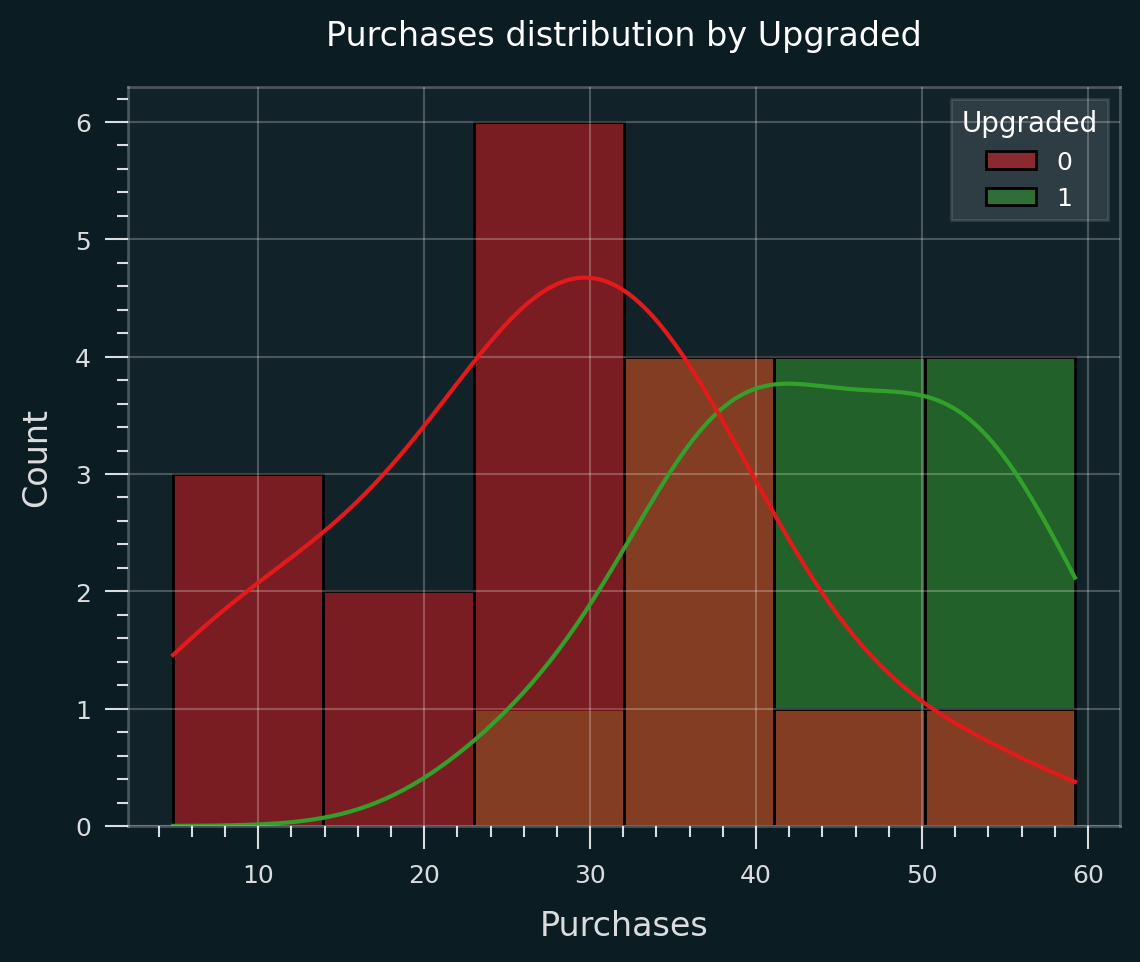

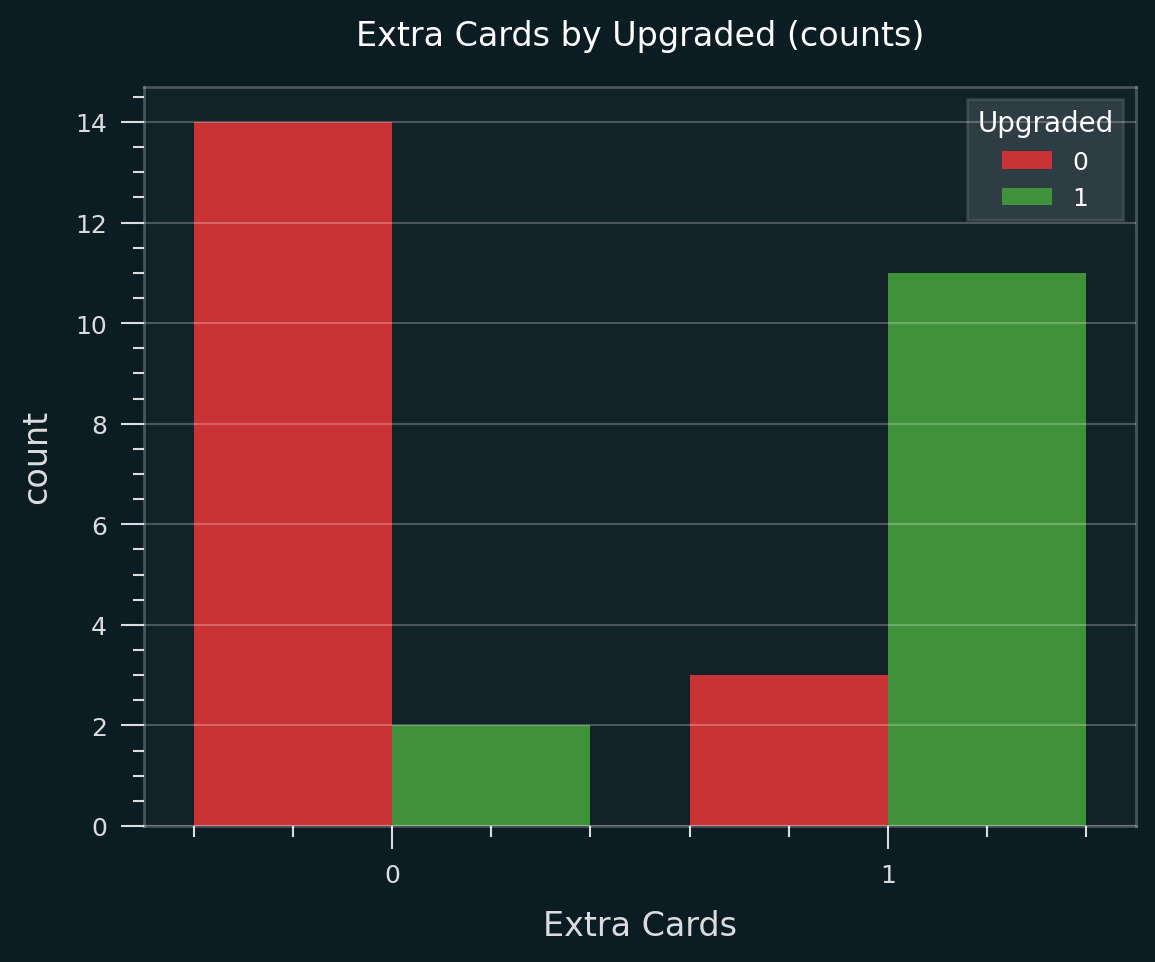

In [ ]:
# Visualize the distribution of Purchase by Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase distribution
sns.countplot(data=df, x='Purchase', ax=axes[0])
axes[0].set_title('Distribution of Purchase')
axes[0].set_xlabel('Purchase (0=No, 1=Yes)')

# Price distribution by Purchase
sns.boxplot(data=df, x='Purchase', y='Price', ax=axes[1])
axes[1].set_title('Price Distribution by Purchase')
axes[1].set_xlabel('Purchase (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

## Model A: Purchase ~ Price

We will first build a logistic regression model to predict `Purchase` using only `Price`.


In [ ]:
# Define features for Model A
X_a = df[['Price']]
X_a = sm.add_constant(X_a)

# Fit the model
model_a = sm.Logit(y, X_a).fit()

# Display the summary
print(model_a.summary())


                           Logit Regression Results                           
Dep. Variable:               Upgraded   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                  0.5110
Time:                        15:01:55   Log-Likelihood:                -10.038
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                 2.785e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.9398      2.947     -2.355      0.019     -12.716      -1.163
Purchases       0.1395      0.068      2.049      0.040       0.006       0.273
Extra Cards     2.7743      1.193      2.326    

## Model B: Purchase ~ Price + Gender

Now we will build a second model including `Gender` as a predictor.


In [ ]:
# Define features for Model B
X_b = df[['Price', 'Gender']]
X_b = sm.add_constant(X_b)

# Fit the model
model_b = sm.Logit(y, X_b).fit()

# Display the summary
print(model_b.summary())

## Odds Ratios (Model B)

We calculate the odds ratios by taking the exponential of the coefficients.


In [ ]:
# Calculate Odds Ratios
odds_ratios = np.exp(model_b.params)
print("Odds Ratios:")
print(odds_ratios)

# Interpretation
print("\nInterpretation:")
print(f"For every $1 increase in Price, the odds of purchasing from Pizza Hut change by a factor of {odds_ratios['Price']:.4f}.")
print(f"Being Male (Gender=1) changes the odds of purchasing from Pizza Hut by a factor of {odds_ratios['Gender']:.4f} compared to Female.")

## Predictions

Predict the probability of purchase for a customer when the price is $10.49, for both Male and Female.


In [ ]:
# Define scenarios
scenarios = pd.DataFrame({
    'const': [1, 1],
    'Price': [10.49, 10.49],
    'Gender': [1, 0] # 1=Male, 0=Female
})

# Predict probabilities
predictions = model_b.predict(scenarios)

print(f"Probability of Purchase (Price=$10.49, Male): {predictions[0]:.4f}")
print(f"Probability of Purchase (Price=$10.49, Female): {predictions[1]:.4f}")